<a href="https://colab.research.google.com/github/1zpzz/QM2---school-shooting-/blob/main/Hypothesis_Test_PPCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T-statistic: -0.243, Critical Value: 1.677
Fail to Reject H₀: Higher PPCS spending does not significantly affect school shooting rates.


<ipython-input-20-0c0b5945aa0c>:78: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=groups, x='Group', y='Values',


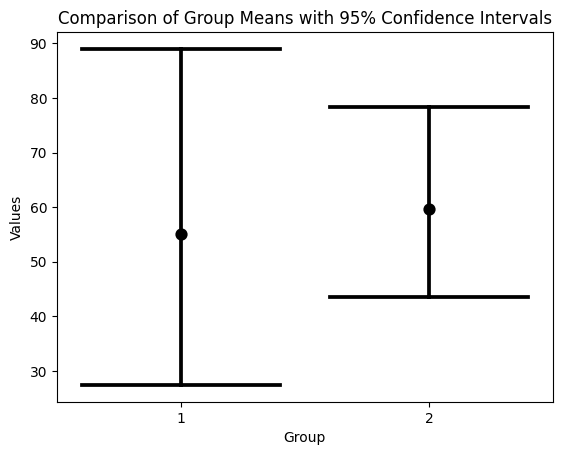

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PPCS spending and school shooting data
ppcs_file = "/content/ESSA 2022-2007.xlsx"
shooting_file = "/content/public v3 .csv"

ppcs_df = pd.read_excel(ppcs_file)
shooting_df = pd.read_csv(shooting_file)

# Clean the PPCS data
ppcs_cleaned_df = ppcs_df[['state', 2022]].copy()
ppcs_cleaned_df.columns = ['State', 'PPCS']
ppcs_cleaned_df['State'] = ppcs_cleaned_df['State'].astype(str).str.strip()
ppcs_cleaned_df['PPCS'] = pd.to_numeric(ppcs_cleaned_df['PPCS'], errors='coerce')

# Clean the shooting data
shooting_df[['Year', 'State']] = shooting_df['Year;state'].str.split(';', expand=True)
shooting_df['State'] = shooting_df['State'].str.strip().str.upper()
shooting_counts = shooting_df.groupby('State').size().reset_index(name='incident_count')

# Map full state names to abbreviations
state_abbreviation_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
ppcs_cleaned_df['State'] = ppcs_cleaned_df['State'].map(state_abbreviation_map)

# Remove unmatched entries
shooting_counts = shooting_counts[shooting_counts['State'].isin(ppcs_cleaned_df['State'])]

# Merge datasets
merged_df = pd.merge(ppcs_cleaned_df, shooting_counts, on='State', how='inner')

# Split data based on PPCS spending
mean_ppcs = merged_df['PPCS'].mean()
high_ppcs = merged_df[merged_df['PPCS'] > mean_ppcs]['incident_count']
low_ppcs = merged_df[merged_df['PPCS'] <= mean_ppcs]['incident_count']

# Perform t-test statistic manually
df = len(high_ppcs) + len(low_ppcs) - 2
critical_value = np.abs(t.ppf(0.05, df))

# Calculate t-statistic manually
mean_diff = high_ppcs.mean() - low_ppcs.mean()
pooled_std = np.sqrt(low_ppcs.var(ddof=1)/len(low_ppcs) + high_ppcs.var(ddof=1)/len(high_ppcs))
t_stat = mean_diff / pooled_std

print(f"T-statistic: {t_stat:.3f}, Critical Value: {critical_value:.3f}")

# Hypothesis Decision
if t_stat < -critical_value:
    print("Reject H₀: Higher PPCS spending significantly reduces school shooting rates.")
else:
    print("Fail to Reject H₀: Higher PPCS spending does not significantly affect school shooting rates.")

# Visualization matching the provided structure
groups = pd.DataFrame({'Values': pd.concat([high_ppcs, low_ppcs]),
                       'Group': [1]*len(high_ppcs) + [2]*len(low_ppcs)})

sns.pointplot(data=groups, x='Group', y='Values',
              errorbar=('ci', 95), color='black', join=False, capsize=.8)
plt.xlabel('Group')
plt.ylabel('Values')
plt.title('Comparison of Group Means with 95% Confidence Intervals')
plt.show()
